<a href="https://colab.research.google.com/github/basleal22/baslealwork/blob/main/project102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)
#preprocess data
train_datagen = ImageDataGenerator(1./255)
test_datagen = ImageDataGenerator(1./255)

In [ ]:
#set up path of our training and test directories
train_dir = "/content/drive/MyDrive/project101/train"
test_dir = "/content/drive/MyDrive/project101/test"
#import data from our directories
train_data=train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
test_data=test_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

Found 2609 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [ ]:
model_1= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")]
    )

In [ ]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history=model_1.fit(train_data,epochs=15,validation_data=test_data)

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/15
82/82 [==============================] - 274s 3s/step - loss: 2.9168 - accuracy: 0.5420 - val_loss: 0.6919 - val_accuracy: 0.5455
Epoch 2/15
82/82 [==============================] - 14s 173ms/step - loss: 0.6911 - accuracy: 0.5519 - val_loss: 0.6909 - val_accuracy: 0.5455
Epoch 3/15
82/82 [==============================] - 14s 172ms/step - loss: 0.6900 - accuracy: 0.5519 - val_loss: 0.6901 - val_accuracy: 0.5455
Epoch 4/15
82/82 [==============================] - 14s 168ms/step - loss: 0.6892 - accuracy: 0.5519 - val_loss: 0.6896 - val_accuracy: 0.5455
Epoch 5/15
82/82 [==============================] - 14s 170ms/step - loss: 0.6887 - accuracy: 0.5519 - val_loss: 0.6893 - val_accuracy: 0.5455
Epoch 6/15
82/82 [==============================] - 14s 169ms/step - loss: 0.6883 - accuracy: 0.5519 - val_loss: 0.6891 - val_accuracy: 0.5455
Epoch 7/15
82/82 [==============================] - 14s 171ms/step - loss: 0.6881 - accuracy: 0.5519 - val_loss: 0.6891 - val_accuracy: 0.5455
E

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


21/21 [==============================] - 3s 123ms/step


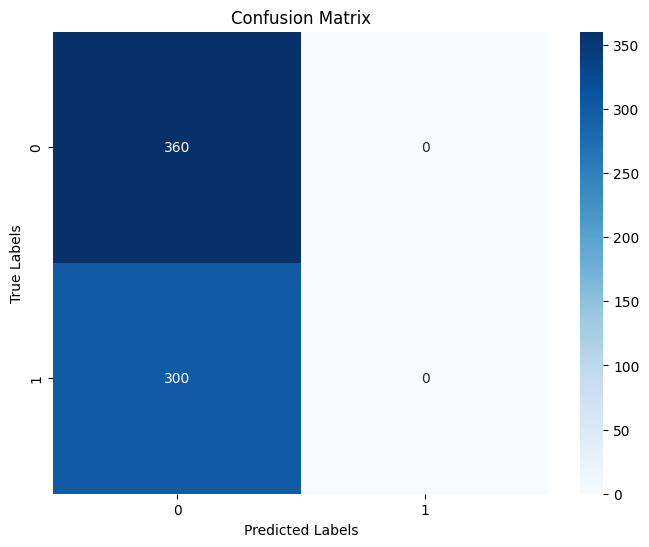

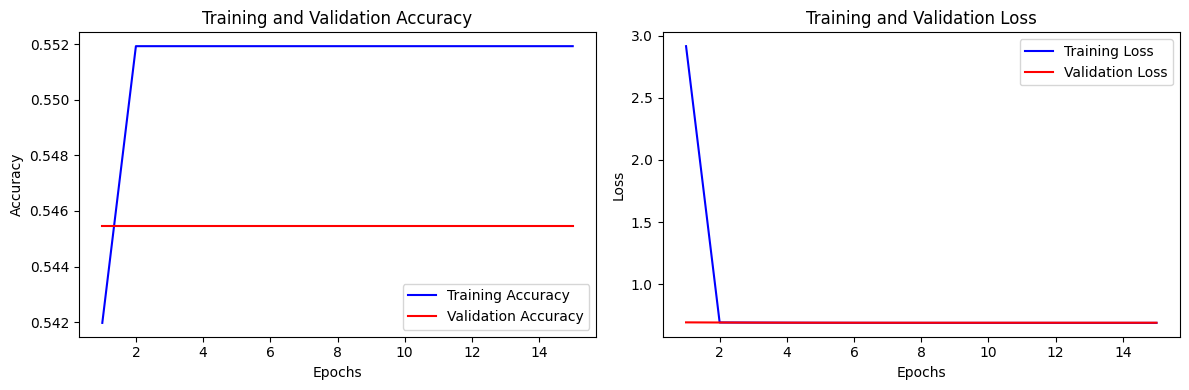

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have trained the model and loaded the test data

# Predict the labels for the test data
y_pred = model_1.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels for the test data
y_true = test_data.classes

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot accuracy and loss curves
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
